<a href="https://colab.research.google.com/github/asha-murthy/DataScientist/blob/main/Yulu_Hypothesis_Testing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There are no missing values

Datatype of following attributes needs to changed to proper data type

datetime - to datetime

season - to categorical

holiday - to categorical

workingday - to categorical

weather - to categorical

In [ ]:
df['datetime']= pd.to_datetime(df['datetime'])
categorical =['season', 'holiday', 'workingday', 'weather']
for i in categorical:
  df[i]= df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


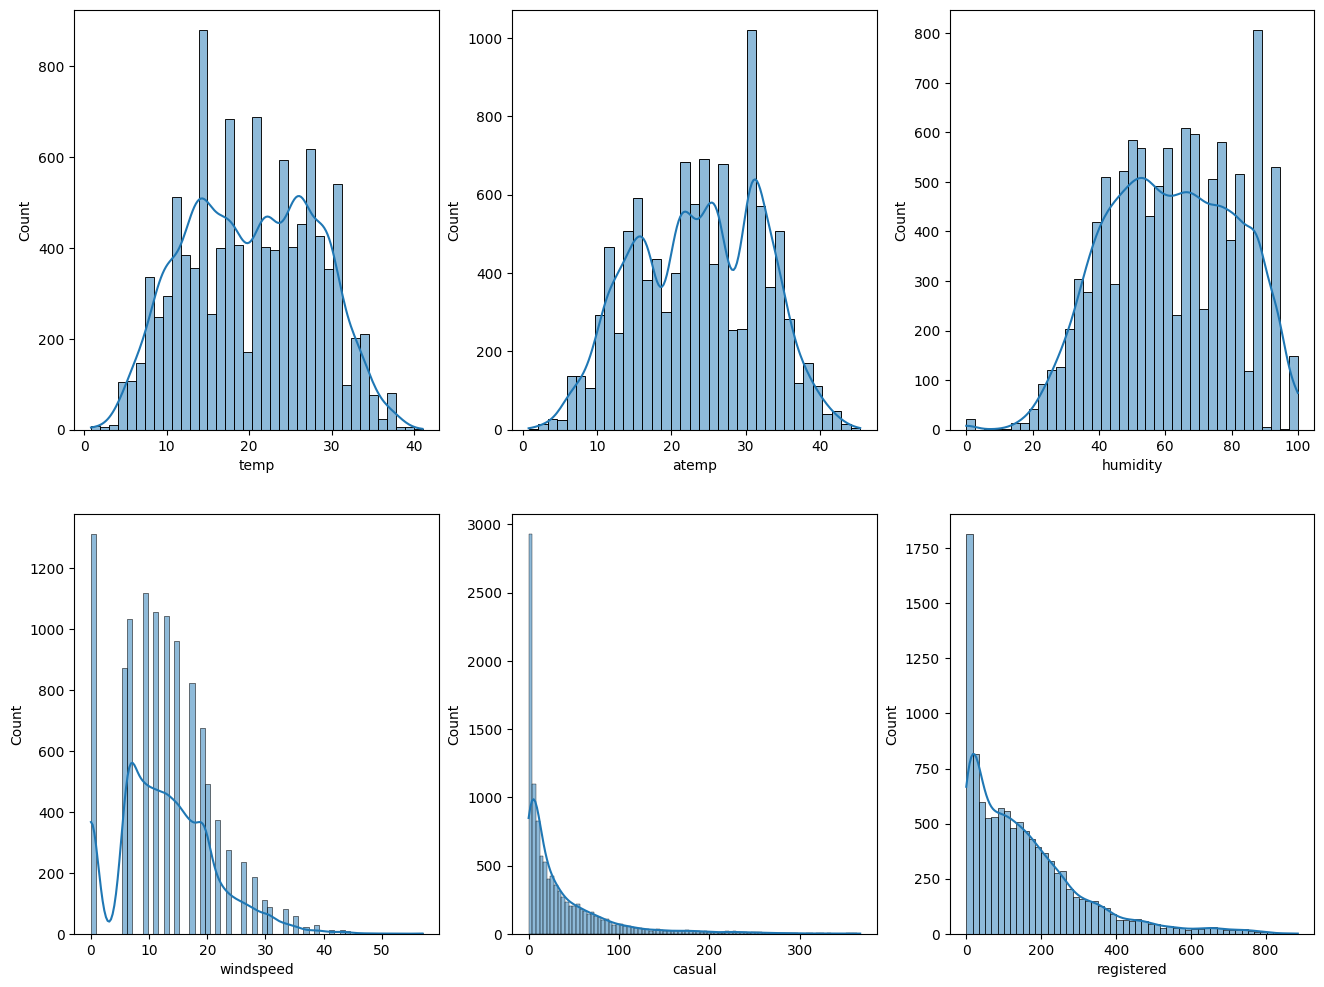

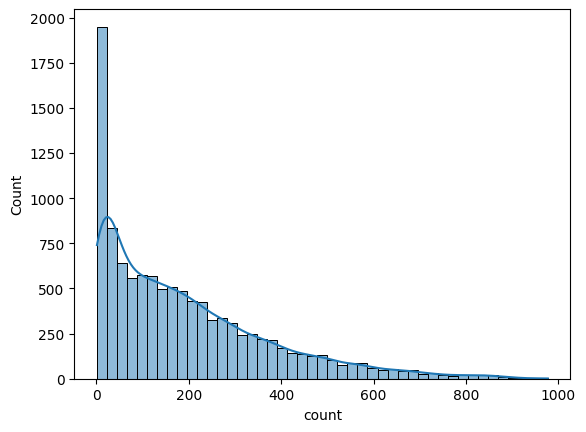

In [ ]:
num_cols =['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(16,12))

index =0
for row in range(2):
  for col in range(3):
    sns.histplot(df[num_cols[index]], ax = axis[row,col], kde=True)
    index+=1
plt.show()
sns.histplot(df[num_cols[-1]],kde =True)
plt.show()


casual, registered and count somewhat looks like Log Normal Distrinution

temp, atemp and humidity looks like they follows the Normal Distribution

windspeed follows the binomial distribution

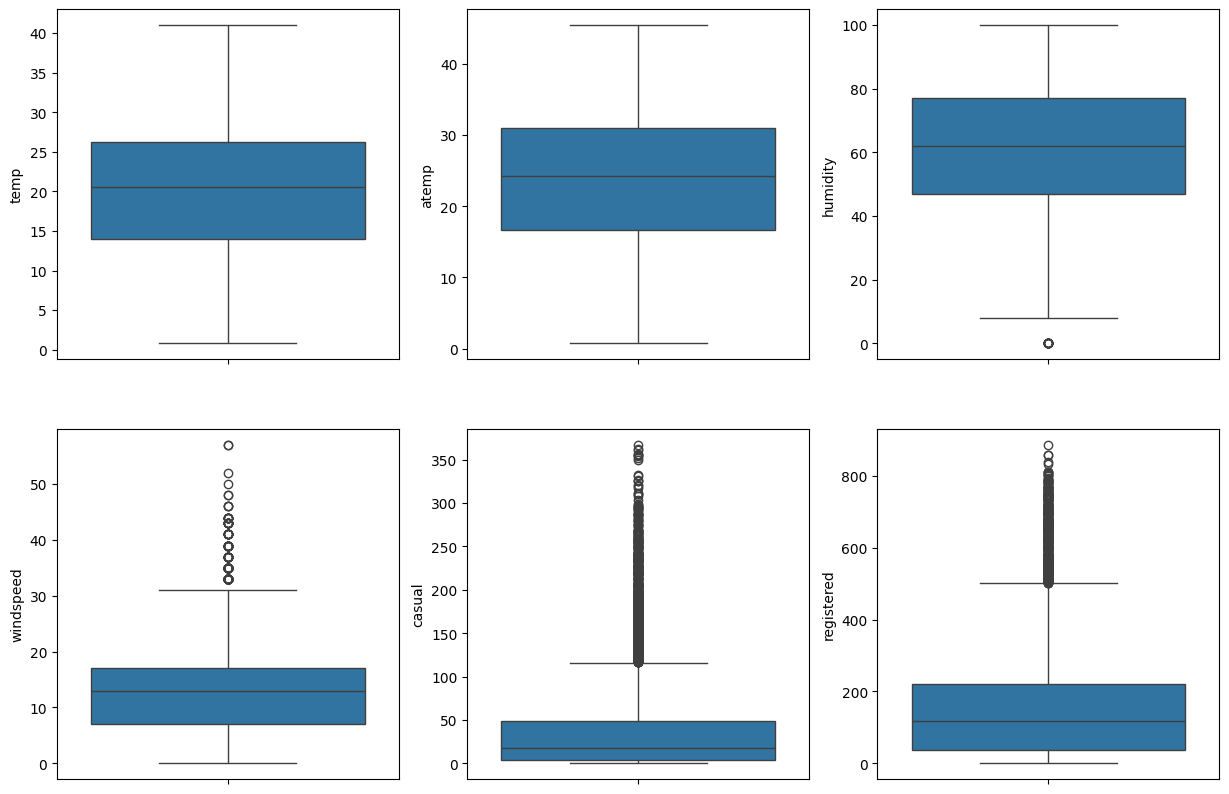

In [ ]:
# plotting box plots to detect outliers in the data
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(15,10))

index =0
for row in range(2):
  for col in range(3):
    sns.boxplot(df[num_cols[index]],ax=axis[row,col])
    index+=1
plt.show()

Looks like humidity, casual, registered and count have outliers in the data.

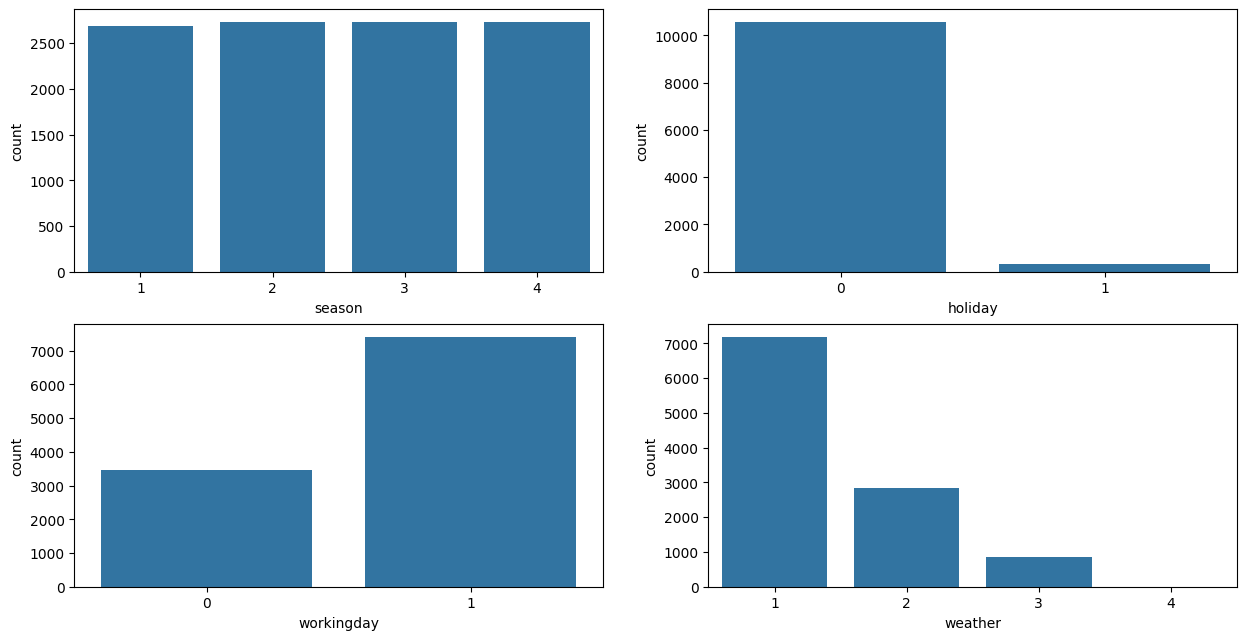

In [ ]:
cat_cols = ["season","holiday","workingday","weather"]
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(15,7.5))

index =0
for row in range(2):
  for col in range(2):
    sns.countplot(data=df,x=df[cat_cols[index]],ax=axis[row,col])
    index+=1
plt.show()

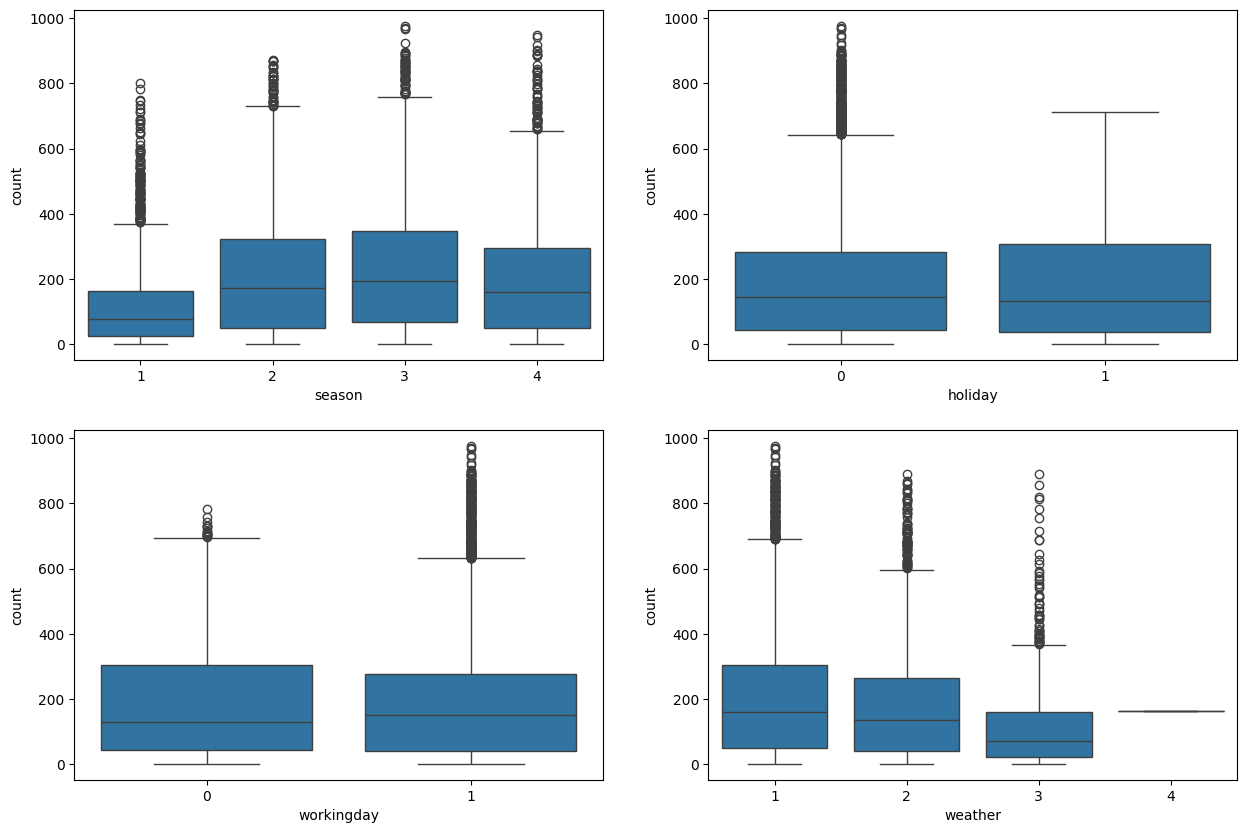

In [ ]:
# plotting categorical variables againt count using boxplots
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
index=0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=df,x=df[cat_cols[index]],y= df["count"],ax=axis[row,col])
    index+=1
plt.show()

In summer and fall seasons more bikes are rented as compared to other seasons.

Whenever its a holiday more bikes are rented.

It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.

Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

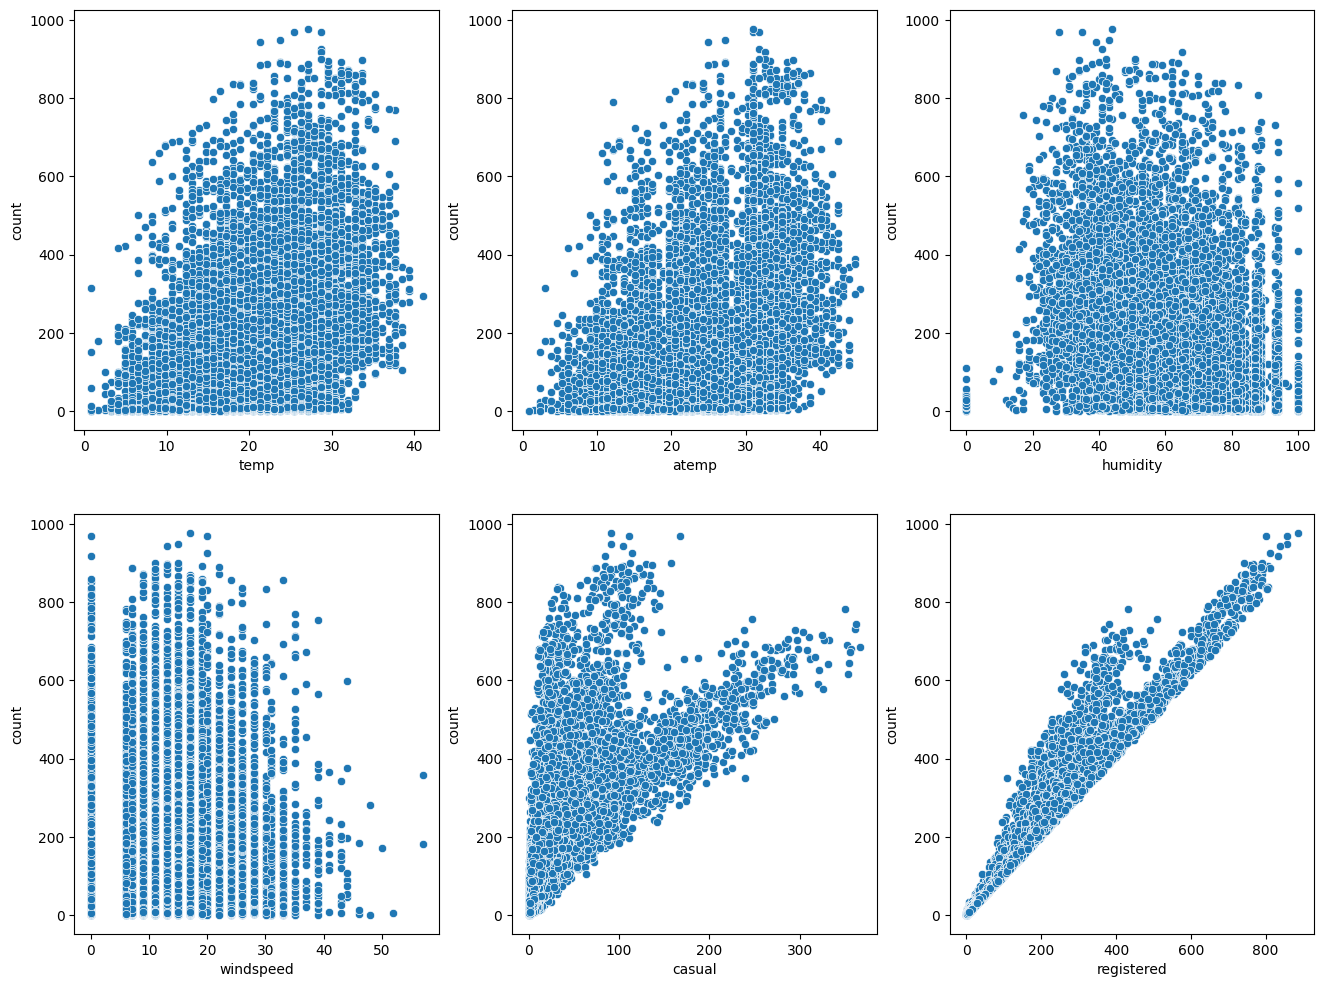

In [ ]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

Whenever the humidity is less than 20, number of bikes rented is very very low.

Whenever the temperature is less than 10, number of bikes rented is less.

Whenever the windspeed is greater than 35, number of bikes rented is less.

In [ ]:
# understanding the correlation between count and numerical variables
df.corr()['count']

,count
datetime,0.310187
season,0.163439
holiday,-0.005393
workingday,0.011594
weather,-0.128655
temp,0.394454
atemp,0.389784
humidity,-0.317371
windspeed,0.101369
casual,0.690414


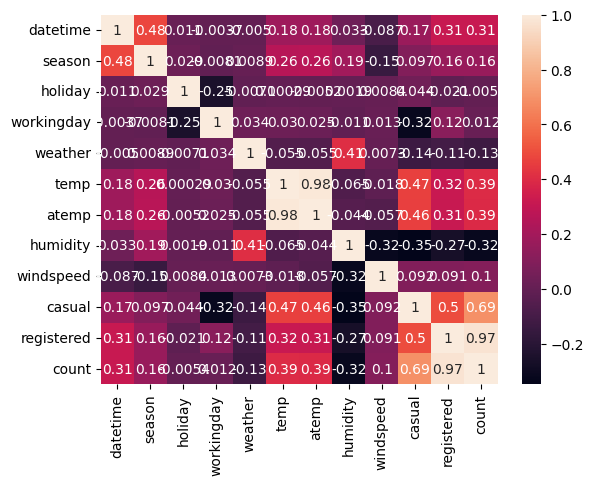

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df["workingday"].value_counts(normalize=True)*100

,proportion
workingday,
1,68.087452
0,31.912548


In [ ]:
df["weather"].value_counts(normalize=True)*100

,proportion
weather,
1,66.066507
2,26.033437
3,7.890869
4,0.009186


In [ ]:
df["season"].value_counts(normalize=True)*100

,proportion
season,
4,25.114826
2,25.105640
3,25.105640
1,24.673893


In [ ]:
df_11=pd.crosstab(df["workingday"],df["weather"])
df_11

weather,1,2,3,4
workingday,,,,
0,2353,897,224,0
1,4839,1937,635,1


In [ ]:
df.groupby(["workingday"])[["casual","registered","count"]].sum()

,casual,registered,count
workingday,,,
0,206037,448835,654872
1,186098,1244506,1430604


In [ ]:
df.groupby(["weather"])[["casual","registered","count"]].sum()

,casual,registered,count
weather,,,
1,289900,1186163,1476063
2,87246,419914,507160
3,14983,87106,102089
4,6,158,164


In [ ]:
df.groupby(["season"])[["casual","registered","count"]].sum()

,casual,registered,count
season,,,
1,41605,270893,312498
2,129672,458610,588282
3,142718,497944,640662
4,78140,465894,544034


<Axes: xlabel='workingday', ylabel='count'>

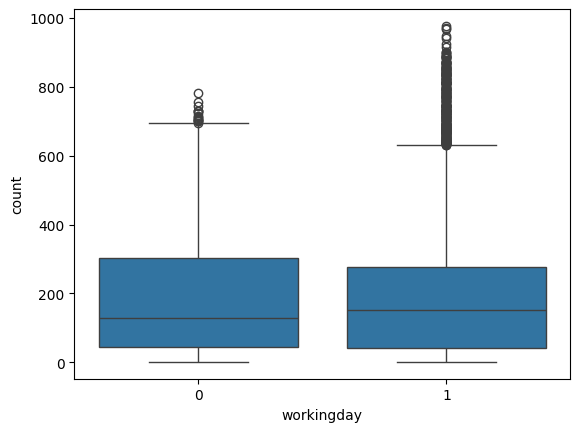

In [ ]:
sns.boxplot(data=df,x=df["workingday"],y=df["count"])

<Axes: xlabel='weather', ylabel='count'>

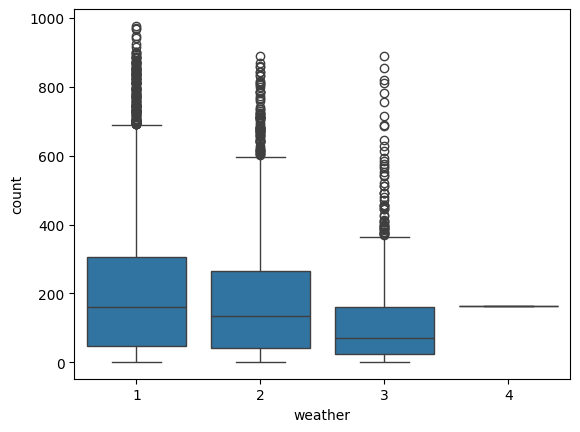

In [ ]:
sns.boxplot(data=df,x=df["weather"],y=df["count"])

<Axes: xlabel='season', ylabel='count'>

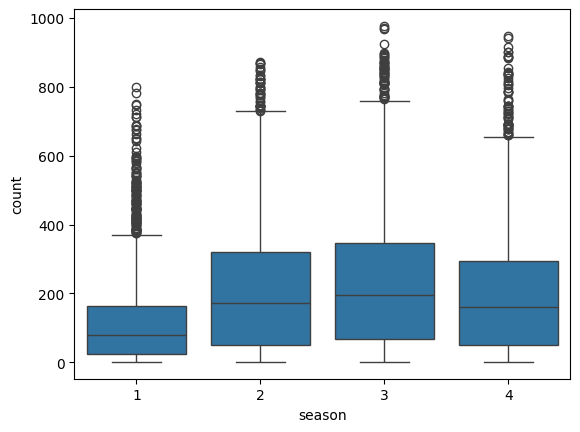

In [ ]:
sns.boxplot(data=df,x=df["season"],y=df["count"])

**Hypothesis Test 1**

Ho : Working Day has no effect on bike rentals

Ha: Working day has effect on bike rentals

Since the data we work is numerical vs categorical, and how dependent each category(week day, weekend) on the rentals.

appropriate test - t-test_independent significance level alpha - 0.05

In [ ]:
from scipy.stats import ttest_ind
test1=df[df["workingday"]==1][["count"]]
test2=df[df["workingday"]==0][["count"]]

ttest,pvalue=ttest_ind(test1,test2,equal_var=False,alternative="greater")
alpha=0.05

print(alpha,ttest,pvalue)


if pvalue<alpha:
  print("Result : Reject null hypothesis, Working day has effect on bike rentals")
else:
  print("Result : Fail to reject null hypothesis, Working day has no effect on bike rentals")

0.05 [1.23625804] [0.10820156]
Result : Fail to reject null hypothesis, Working day has no effect on bike rentals


**Hypothesis testing 2**

Ho : Weather has no effect on bike rentals

Ha: Weather has effect on bike rentals

Since the data we work is numerical vs >2 categorical, and how dependent rentals on each weather category

appropriate test - ANOVA

significance level alpha - 0.05

Since , it is anova test.the normality(shapiro,qqplot,kstest) and equal variances(levenes test) should be tested

In [ ]:
df.weather.value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [ ]:
df_new=df[~(df["weather"]==4)]

In [ ]:
test_1=df_new[df_new["weather"]==1][["count"]]
test_2=df_new[df_new["weather"]==2][["count"]]
test_3=df_new[df_new["weather"]==3][["count"]]

In [ ]:
#for normality test , we are taking shapiros test
from scipy.stats import shapiro
sstat,pvalue=shapiro(df_new["count"].sample(4999))
print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

1.4055260342101347e-51
its gaussian(normal distribution)


In [ ]:
# normality test kstest
from scipy.stats import kstest
kstat,pvalue=kstest(test_1["count"],test_2["count"],test_3["count"])

print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

2.0232588507344455e-07
its gaussian(normal distribution)


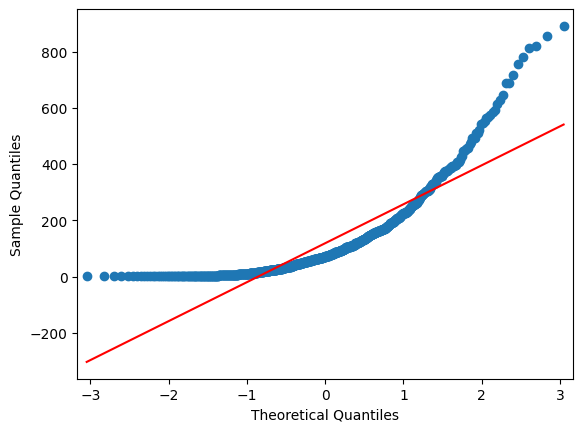

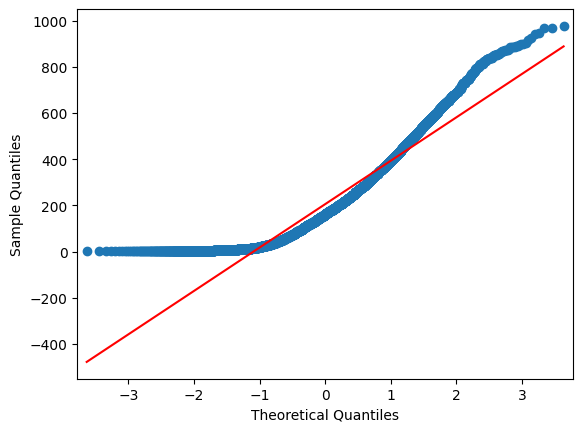

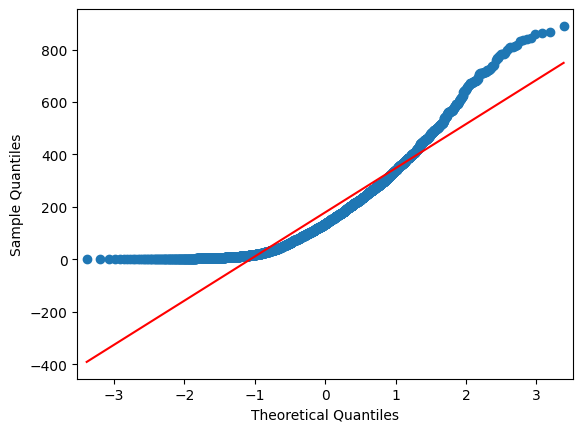

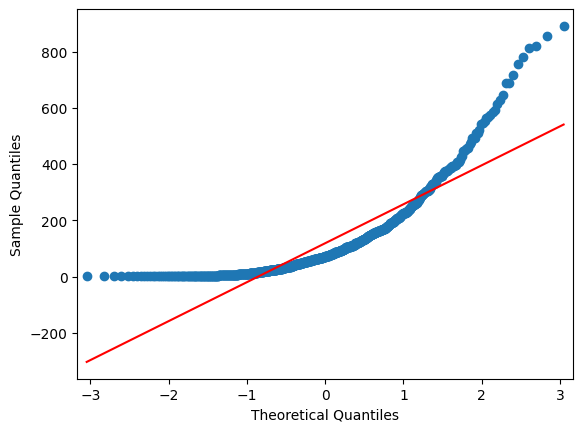

In [ ]:
#normality test qq plot, this output shows its not gaussian, since the percentile of sample is not
# intact with line of gaussian distribution
from statsmodels.graphics.gofplots import qqplot
qqplot(test_1["count"],line="s")
qqplot(test_2["count"],line="s")
qqplot(test_3["count"],line="s")

In [ ]:
#equal variance test - Levenes test
#ho:variance is equal
#ha:variance is not equal
from scipy.stats import levene

lstat,pvalue=levene(test_1["count"],test_2["count"],test_3["count"])

print(pvalue)

if pvalue<0.05:
  print("reject Ho,variance is not equal ")
else:
  print("fail to reject Ho,variance is equal ")

6.198278710731511e-36
reject Ho,variance is not equal 


In [ ]:
from scipy.stats import f_oneway


ftest,pvalue=f_oneway(test_1,test_2,test_3)
alpha=0.05

print(alpha,ftest,pvalue)

if pvalue<alpha:
  print("Result : Reject null hypothesis, Weather has effect on bike rentals")
else:
  print("Result : Fail to reject null hypothesis, Weather has no effect on bike rentals")

0.05 [98.28356882] [4.97644851e-43]
Result : Reject null hypothesis, Weather has effect on bike rentals


**Hypothesis Testing 3**

Ho : Season has no effect on bike rentals

Ha: Season has effect on bike rentals

Since the data we work is numerical vs >2 categorical, and how dependent rentals on each weather category

appropriate test - ANOVA

significance level alpha - 0.05

Since , it is anova test.the normality(shapiro,qqplot,kstest) and equal variances(levenes test) should be tested

In [ ]:
df_new.season.value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2685


In [ ]:
s1=df_new[df_new["season"]==1][["count"]]
s2=df_new[df_new["season"]==2][["count"]]
s3=df_new[df_new["season"]==3][["count"]]
s4=df_new[df_new["season"]==4][["count"]]

In [ ]:
#for normality test , we are taking shapiros test
from scipy.stats import shapiro
sstat,pvalue=shapiro(df_new["count"].sample(4999))
print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

7.489859746133396e-52
its gaussian(normal distribution)


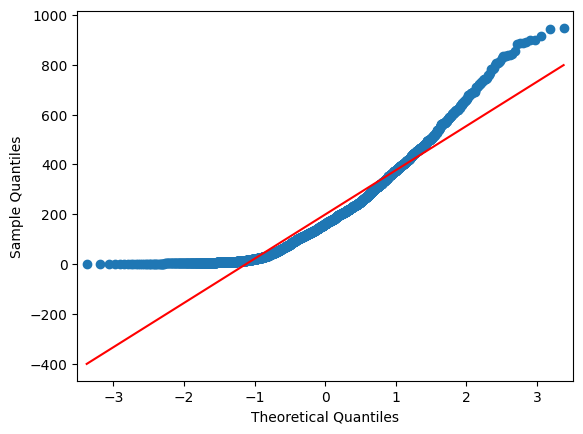

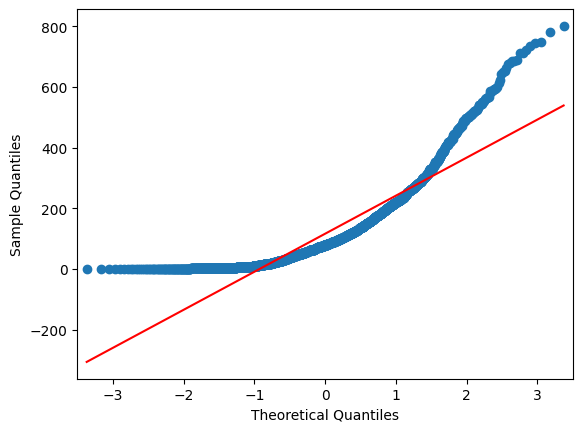

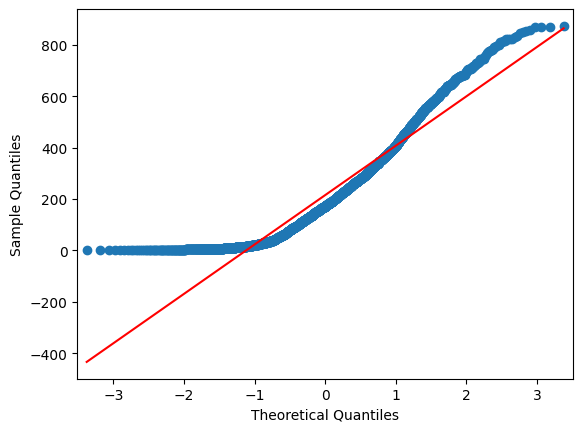

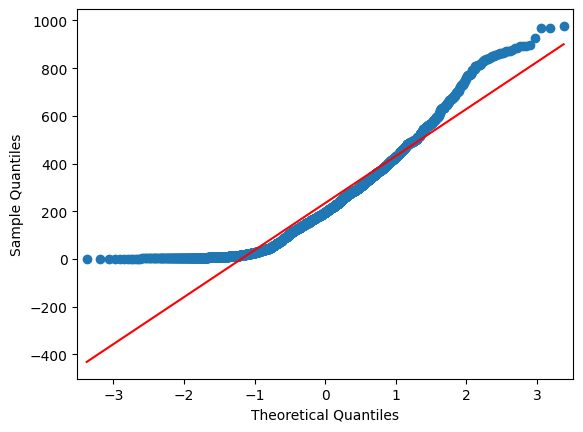

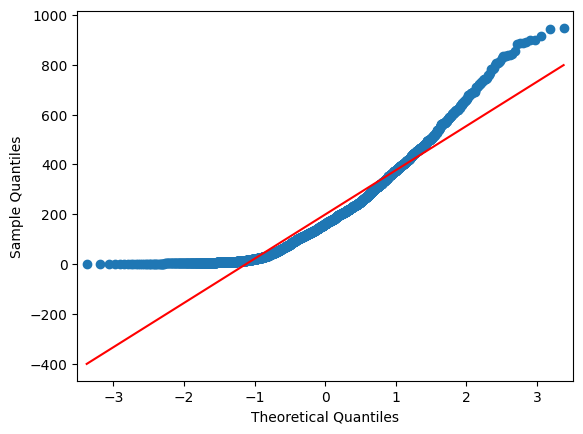

In [ ]:
# (normality test qq plot, this output shows its not gaussian, since the percentile of sample is not,
# intact with line of gaussian distribution)
from statsmodels.graphics.gofplots import qqplot
qqplot(s1["count"],line="s")
qqplot(s2["count"],line="s")
qqplot(s3["count"],line="s")
qqplot(s4["count"],line="s")

In [ ]:
# normality test kstest
from scipy.stats import kstest
kstat,pvalue=kstest(s1["count"],s2["count"],s3["count"],s4["count"])

print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

3.604075062604066e-90
its gaussian(normal distribution)


In [ ]:
#equal variance test - Levenes test
#ho:variance is equal
#ha:variance is not equal
from scipy.stats import levene

lstat,pvalue=levene(s1["count"],s2["count"],s3["count"],s4["count"])

print(pvalue)

if pvalue<0.05:
  print("reject Ho,variance is not equal ")
else:
  print("fail to reject Ho,variance is equal ")

1.1170990373788981e-118
reject Ho,variance is not equal 


In [ ]:
from scipy.stats import f_oneway


ftest,pvalue=f_oneway(s1,s2,s3,s4)
alpha=0.05

print(alpha,ftest,pvalue)

if pvalue<alpha:
  print("Result : Reject null hypothesis, Season has effect on bike rentals")
else:
  print("Result : Fail to reject null hypothesis, Season has no effect on bike rentals")

0.05 [236.94289499] [6.20406947e-149]
Result : Reject null hypothesis, Season has effect on bike rentals


**Hypothesis Testing 4**

Ho : Weather has no effect on seasons

Ha: Weather has effect on seasons

Since the data we work is categorical vs categorical, and how dependent rentals on each weather category

appropriate test - Chi-square test

significance level alpha - 0.05

In [ ]:
df_f= df_new[["season","weather","count"]]
df1=pd.crosstab(index=df_f["season"],columns=df_f["weather"],values=df_f["count"],aggfunc = 'mean').reset_index(drop=True)
df1

weather,1,2,3
0,126.781694,106.861538,61.227488
1,236.729595,189.515537,123.906250
2,243.583420,230.771523,156.582915
3,209.511163,194.784387,134.466667


In [ ]:
from scipy.stats import chi2_contingency

Xistat,p_value,dof,exp_freq=chi2_contingency(df1)

print(p_value)
alpha=0.05

if pvalue<alpha:
  print("Result : Reject null hypothesis, Weather has effect on seasons")
else:
  print("Result : Fail to reject null hypothesis, Weather has no effect on seasons")

0.5782339876834344
Result : Reject null hypothesis, Weather has effect on seasons


**Insights**

In summer and fall seasons more bikes are rented as compared to other seasons.

Its observed that whenever there is Clear, Few clouds, partly cloudy the bike rental is more in comparison to other weather conditions.

71 % of rentals happened during Clear, Few clouds, partly cloudy weather.

Whenever its a holiday more bikes are rented.


It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.


Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.


Whenever the humidity is less than 20, number of bikes rented is very very low.


Whenever the temperature is less than 10, number of bikes rented is less.


Whenever the windspeed is greater than 35, number of bikes rented is less.


Registered users of rental bikes contribute more in comparison to the casual users


Based on hypothesis testing,weather and season do have effects on the bike rentals




**Recommendations**

In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.


With a significance level of 0.05, workingday has no effect on the number of bikes being rented.


In very low humid days, company should have less bikes in the stock to be rented.


Whenever temprature is less than 10 or in very cold days, company should have less bikes.


Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.


Since the registered users are highest contributors, this show positive sign of the service provided by the company and must continue maintaining the levels during the highest demand spike seasons too


Based on the weather conditions,rentals happens mostly during the clearsky and in other conditions can take bikes for maintanence based on pareto principle